# Matplotlib - Intro

* **matplotlib** is a Python plotting library for producing publication quality figures
    * allows for interactive, cross-platform control of plots
    * makes it easy to produce static raster or vector graphics
        * gives the developer complete control over the appearance of their plots, while still being usable through a powerful defaults system
* standard scientific plotting library
* online documentnation is on [matplotlib.org](https://matplotlib.org/index.html), with lots of examples in the [gallery](https://matplotlib.org/gallery.html)

* behaves similarly to Matlab

In [1]:
import matplotlib.pyplot as plt

To be efficient with **matplotlib**, you first need to understand its termonology.

## Parts of a Figure

<img src="../figures/matplotlib_figure_parts.png" style="height:60%; width:60%;">

### Figure, Axes, Axis

* **Figure** is the whole image, the top-level 'container' that holds all objects of an image.
* **Axes** is the region of a **Figure** that displays your data. Most plotting occurs here! Very similar to a subplot
* **Axes** contains **Axis** objects (x axis,y axis) which control the data limits.
* **Figure** can have any number of **Axes**, but to be useful should have at least one.

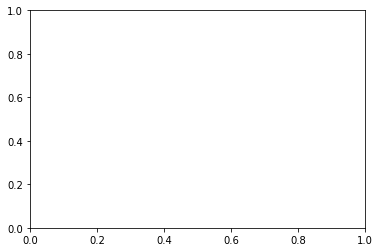

In [4]:
fig = plt.figure() # Create a figure
axes = fig.add_subplot(111) # add one Axes to Figure

Usually an **Axes** is set up with a call to `fig.add_subplot()`, `plt.subplot()`, or `plt.subplots()` 

The most flexible option is `plt.subplots()`

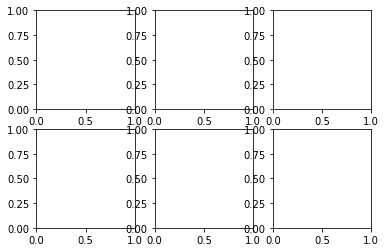

In [68]:
fig,axes = plt.subplots(2,3) # will create a figure and 6 axes arranged in 2 rows, 3 columns

**Exercise 0 (5 mins)**. Create single and multiple empty subplots.

In [7]:
# Your code here

### Line plots

Lets draw two cosine functions of different amplitude on the same **Axes**.

In [8]:
import numpy as np

In [71]:
# Create data
X = np.linspace(-np.pi, np.pi, 100, endpoint=True)
Y1 = np.cos(X)
Y2 = 2*np.cos(X)

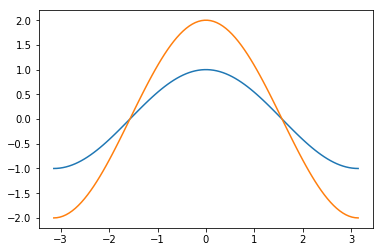

In [72]:
# Plot data
fig, axes = plt.subplots()
axes.plot(X, Y1)
axes.plot(X, Y2);

** Tip: by adding a semicolon at the end of a function, the output is suppressed.

### Default and named colors

![](../figures/dflt_style_changes-1.png)

**Exercise 1 (10 mins)**. The figure before is generated using the default settings. The code below shows these settings explicitly. Play with the values to explore their affect. For details on changing properties see [line plots on the matplotlib website](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

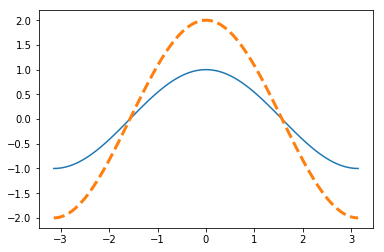

In [77]:
# Plot data (with explicit plotting settings)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
axes.plot(X, Y1, color='C0', linewidth=1.5, linestyle='-')
axes.plot(X, Y2, color='C1', linewidth=3.0, linestyle='--')

**Exercise 2 (10 mins)**. Having integer numbers on the x axis here might divert reader's attention from the critical points of the graph.

1. Change **xticks** and **xticklabels** into multiples of $\pi$. Use `axes.set_xticks()` and `axes.set_xticklabels()`.

\*\* Tip: use `np.pi` for **xticks** and '\$\pi$' for **xticklabels**.

In [13]:
# Your code here

**Exersise 3 (5 mins)**. Lets move the center of the coordinate system (the origin) to (0,0). For that we need to work with the **spines**, lines connecting the axis tick marks and noting the boundaries of the data area.
1. Use `axes.spines` attribute. 
2. Hide two out of four spines (say, top and right) by setting the edgecolor of the spines to 'none'. Use `.set_color()`.
3. Intersect the other two spines (0,0) by using `.set_position()`.

** Tip: visit [spines](https://matplotlib.org/api/spines_api.html).

In [14]:
# Your code here

**Exersise 4 (5 mins)**. Add a legend.
1. Give both cosine functions a name by adding an extra keyword argument, a label, to `axes.plot()`.
2. Add a legend object to **Axes**. 

In [15]:
# Your code here

**Exercise 5 (10 mins)**. Annotate an interesting point on a graph, for example, $2\cos(\frac{\pi}{4})$.
1. Add a single point to the graph by using `axes.plot(..., marker='o')`.
2. Use `axes.annotate(s, xy=..., xytext=...)` to add annotation.

** Tip: visit [annotations](https://matplotlib.org/users/annotations_intro.html).

In [16]:
# Your code here

### Multiple subplots

`plt.subplots()` is a function that creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created. 

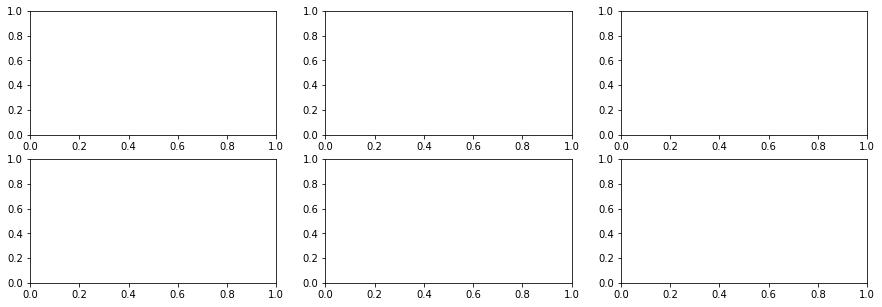

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,5)) # or plt.subplots(2,3,figsize=(15,5))

In [78]:
type(axs), axs.shape

(numpy.ndarray, (2, 3))

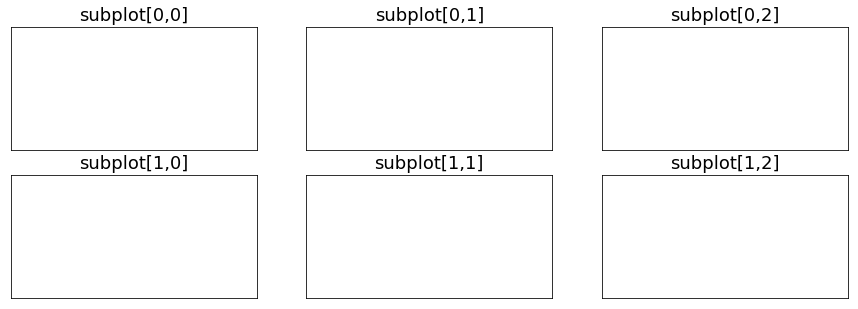

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
axes[0,0].set_title('subplot[0,0]', fontsize=18);
axes[0,1].set_title('subplot[0,1]', fontsize=18);
axes[0,2].set_title('subplot[0,2]', fontsize=18);
axes[1,0].set_title('subplot[1,0]', fontsize=18);
axes[1,1].set_title('subplot[1,1]', fontsize=18);
axes[1,2].set_title('subplot[1,2]', fontsize=18);

for ax in axes.flat: # you can loop over axes
    ax.set_xticks([]);
    ax.set_yticks([]);

### Subplots with real data

Today we are going to work with data from the NOAA ESRL Carbon Cycle Cooperative Global Air Sampling Network.

Source: https://www.esrl.noaa.gov/gmd/dv/data/

Monthly averages of atmospheric carbon dioxide ($CO_2$), methane ($CH_4$) dry air mole fractions, $\delta^{13}C/CO_{2}$ and $\delta^{13}C/CH_{4}$.

Stations: 
* CGO = Cape Grim, Tasmania, Australia
* MHD = Mace Head, County Galway, Ireland

Units:
* $CO_2$ - ppm
* $CH_4$ - ppb
* $\delta^{13}C/CO_{2}$ - ‰ (per mil)
* $\delta^{13}C/CH_{4}$ - ‰ (per mil)

Data stored in a text file. The top row states the number of header lines in the file. No title headers. The actual data is ogranized as following:

Station code | Year | Month | Measurement

CGO            1984     4       341.63  

#### Read data from a text file

The simplest way to load data from a text file in `numpy` is to use `np.loadtxt()` function.

In [21]:
# np.loadtxt() # hit Shift+Tab+Tab

This function has a lot parameters that you can adjuct to fit  your data format. Here we use only:

`np.loadtxt(fname, skiprows=..., usecols=..., unpack=...)`

** Tip: you can do the same with `np.genfromtxt()`. `np.genfromtxt()` provides more sophisticated handling of, e.g., lines with missing values. However, keyword agrument names slightly differ from those in `np.loadtxt()`.

In [22]:
# np.genfromtxt() # hit Shift+Tab+Tab

Out dataset is very simple and does not have any missing values, so lets use `np.loadtxt()`.

In [23]:
data = np.loadtxt('../data/co2_cgo_surface-flask_1_ccgg_month.txt', skiprows=68, usecols=(1, 2, 3))
data

array([[1984.  ,    4.  ,  341.63],
       [1984.  ,    5.  ,  341.73],
       [1984.  ,    6.  ,  342.  ],
       ...,
       [2016.  ,   10.  ,  401.64],
       [2016.  ,   11.  ,  401.35],
       [2016.  ,   12.  ,  400.99]])

In [24]:
type(data), data.shape, data.ndim

(numpy.ndarray, (393, 3), 2)

If we want to have three separate arrays for year, month and value, we can set `unpack=True` and store the output from `np.loadtxt()` function in three separate arrays.

In [25]:
year, month, value = np.loadtxt('../data/co2_cgo_surface-flask_1_ccgg_month.txt', skiprows=68, usecols=(1, 2, 3), unpack=True)

In [26]:
year[0:8]

array([1984., 1984., 1984., 1984., 1984., 1984., 1984., 1984.])

In [27]:
month[0:8]

array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [28]:
value[0:8]

array([341.63, 341.73, 342.  , 342.81, 343.48, 343.31, 343.1 , 343.01])

#### Kwargs

* remember from yesterday, you can store any number of keyword arguments in a dictionary, and later unpack it when calling a function

In [29]:
# Kwargs
read_data_kwargs = dict(skiprows=68, usecols=(1, 2, 3), unpack=True)

In [30]:
# Read data
# CO2 
cgo_co2_yr, cgo_co2_mn, cgo_co2_val = np.loadtxt('../data/co2_cgo_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
mhd_co2_yr, mhd_co2_mn, mhd_co2_val = np.loadtxt('../data/co2_mhd_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
# C13/C12 in CO2 (d13C (CO2))
cgo_co2c13_yr, cgo_co2c13_mn, cgo_co2c13_val = np.loadtxt('../data/co2c13_cgo_surface-flask_1_sil_month.txt', **read_data_kwargs)
mhd_co2c13_yr, mhd_co2c13_mn, mhd_co2c13_val = np.loadtxt('../data/co2c13_mhd_surface-flask_1_sil_month.txt', **read_data_kwargs)
# CH4
cgo_ch4_yr, cgo_ch4_mn, cgo_ch4_val = np.loadtxt('../data/ch4_cgo_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
mhd_ch4_yr, mhd_ch4_mn, mhd_ch4_val = np.loadtxt('../data/ch4_mhd_surface-flask_1_ccgg_month.txt', **read_data_kwargs)
# C13/C12 in CH4 (d13C (CH4))
cgo_ch4c13_yr, cgo_ch4c13_mn, cgo_ch4c13_val = np.loadtxt('../data/ch4c13_cgo_surface-flask_1_sil_month.txt', **read_data_kwargs)
mhd_ch4c13_yr, mhd_ch4c13_mn, mhd_ch4c13_val = np.loadtxt('../data/ch4c13_mhd_surface-flask_1_sil_month.txt', **read_data_kwargs)

#### Datetime

* `datetime` module helps to work with time arrays

In [31]:
from datetime import datetime

In [32]:
datetime.now()

datetime.datetime(2019, 5, 1, 14, 32, 44, 212187)

In [33]:
a_date = datetime(2019, 5, 23)

In [34]:
a_date

datetime.datetime(2019, 5, 23, 0, 0)

In [35]:
python_course_dates = [datetime(2019, 5, i) for i in [22, 23, 24]]

In [36]:
python_course_dates

[datetime.datetime(2019, 5, 22, 0, 0),
 datetime.datetime(2019, 5, 23, 0, 0),
 datetime.datetime(2019, 5, 24, 0, 0)]

Lets apply it to our arrays.

In [37]:
# Using list comprehension
cgo_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2_yr, cgo_co2_mn)]

In [38]:
# Same as in previous cell but using a for loop
cgo_co2_time = []
for i, j in zip(cgo_co2_yr, cgo_co2_mn):
    cgo_co2_time.append(datetime(int(i), int(j), 1))

In [39]:
mhd_co2_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_co2_yr, mhd_co2_mn)]

cgo_co2c13_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_co2c13_yr, cgo_co2c13_mn)]
mhd_co2c13_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_co2c13_yr, mhd_co2c13_mn)]

cgo_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_ch4_yr, cgo_ch4_mn)]
mhd_ch4_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_ch4_yr, mhd_ch4_mn)]

cgo_ch4c13_time = [datetime(int(i), int(j), 1) for i, j in zip(cgo_ch4c13_yr, cgo_ch4c13_mn)]
mhd_ch4c13_time = [datetime(int(i), int(j), 1) for i, j in zip(mhd_ch4c13_yr, mhd_ch4c13_mn)]

**Exercise 6 (30 mins)**. Construct four subplots using the arrays created above. Add titles, x and y labels, legend. Play with optional arguments of `plot()` and try to use **kwargs**.

In [40]:
# Your code here

### Bar charts

* present categorical data with rectangular bars with heights or lengths proportional to the values that they represent
* bars can be plotted vertically or horizontally

`plt.bar(x, height, width, bottom, align='center', **kwargs)`

`plt.barh(y, width, height, left, align='center', **kwargs)`

The bars are positioned at x with the given alignment. Their dimensions are given by width and height. The vertical baseline is bottom (default 0).

Each of x, height, width, and bottom may either be a scalar applying to all bars, or it may be a sequence of length N providing a separate value for each bar.

In [41]:
# Generate some data
x = np.arange(10)
bar_height = x**2
barh_width = x**2-10

**Exercise 7 (10 mins)**. Play with the values in `plt.bar()` and `plt.barh()` functions to explore their affect.

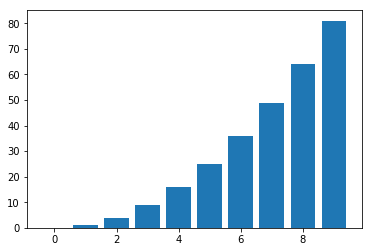

In [42]:
plt.bar(x, bar_height);

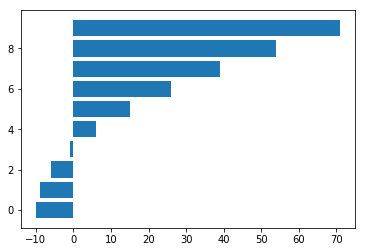

In [43]:
plt.barh(x, barh_width);

In [44]:
# Your code here

### Demonstration of bar() on NAO index data

Now let's use `bar()` to plot the data on North Atlantic oscillation from the NWS Climate Prediction Center. 

Data source: http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/nao.shtml

Variable: monthly mean NAO index since January 1950 till December 2017.

Data stored in text file in the following way:

Year | Month | Value

1950 1 0.92000E+00

In [45]:
# Read NAO data
nao_yr, nao_mn, nao_val = np.loadtxt('../data/nao_monthly.txt', unpack=True)

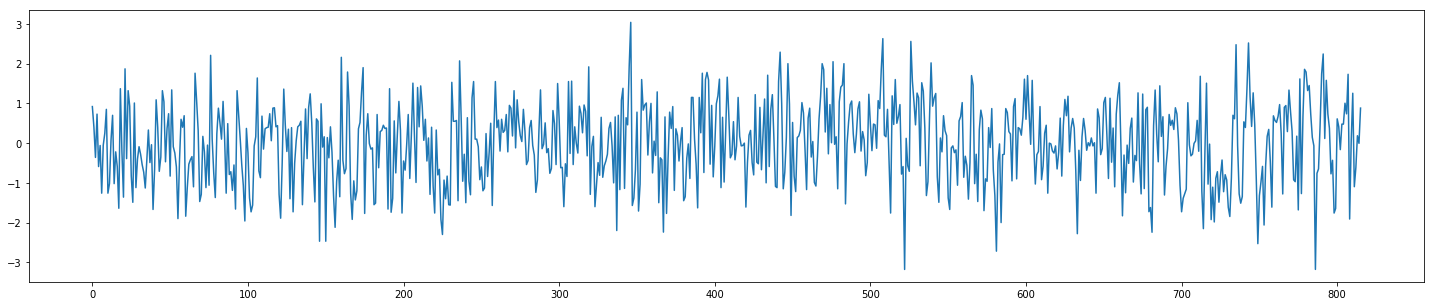

In [46]:
# Quick look at the data
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(nao_val);

Let's focus on the last 5 years and slice `nao_yr`, `nao_mn`, `nao_val` arrays accordingly.

In [47]:
# Slicing
nao_yr_sub = nao_yr[-12*5:]
nao_mn_sub = nao_mn[-12*5:]
nao_val_sub = nao_val[-12*5:]

In [48]:
# Create an array of month numbers
nao_time = np.arange(len(nao_val_sub))
nao_time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

/home/callum/anaconda3/envs/course2019/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


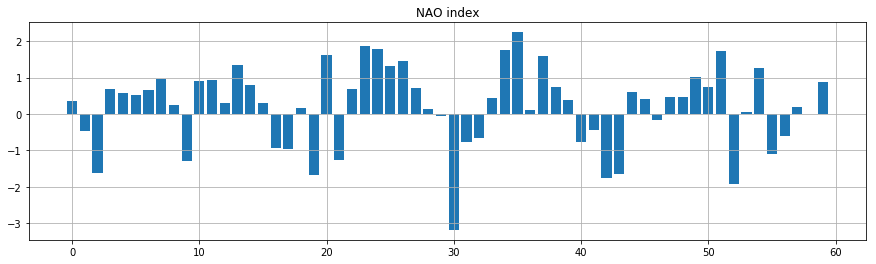

In [49]:
# Plot bar
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(nao_time, nao_val_sub)
ax.set_title('NAO index')
ax.grid('on')

The plot will look much better if we change the color of positive values to red, leaving negative values blue. Plus changing **xticklables** from showing the number of months to months name and a year will be better too. For the latter we will use the `calendar` module.

Red color in RGB format is (1,0,0), blue (0,0,1), black (0,0,0).

In [50]:
[(0, 0, 1)] * len(nao_val_sub) # repeat a list len(nao_val_sub) number of times

[(0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1),
 (0, 0, 1)]

In [51]:
# Colorcode positive values red and negative values blue
red_blue_colors = np.array(   [(0, 0, 1)] * len(nao_val_sub)   ) # repeat a (blue) colour triplet 60 times
red_blue_colors[nao_val_sub >= 0] = (1, 0, 0) # replace blue color by red if the value is non-negative

In [52]:
import calendar

*  `calendar` module allows you to output calendars, and provides additional useful functions related to the calendar

In [53]:
calendar.month_name[1]

'January'

In [54]:
xtick_locs = nao_time[::3] # choose every 3rd xtick and store their locations

In [55]:
# Create xticklabels
xtick_labels = []
for mn, yr in zip(nao_mn_sub[::3], nao_yr_sub[::3]):
    if mn == 1:
        lab = '{}\n{:.0f}'.format(calendar.month_name[int(mn)][:3], yr) # adding month and a year
    else:
        lab = calendar.month_name[int(mn)][:3] # month only
    xtick_labels.append(lab)

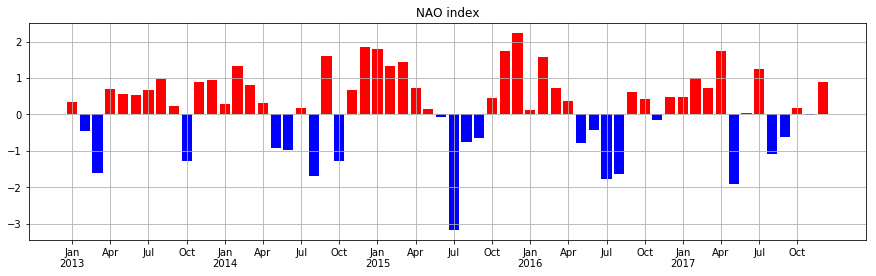

In [56]:
# Final bar chart
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(nao_time, nao_val_sub, color=red_blue_colors)
ax.set_title('NAO index')
ax.grid('on')
ax.set_xticks(xtick_locs);
ax.set_xticklabels(xtick_labels);

### Scatter plots

* display data as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis
* colorcode the data points to display an additional variable
* good for non-gridded data

`scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, edgecolors=None, **kwargs)`

In [57]:
# plt.scatter() # hit Tab+Tab

In [58]:
# Generate some data (circles of random diameter)
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
area = np.pi*(15*np.random.rand(N))**2  # 0 to 15 point radii
colors = np.random.rand(N)

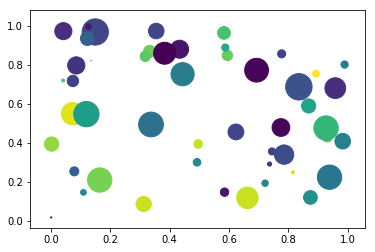

In [59]:
# Plot scatter
plt.scatter(x, y, s=area, c=colors);

### Default sequantial and diverging colormaps

More info here, [colormaps reference](https://matplotlib.org/examples/color/colormaps_reference.html).

<img src="../figures/colormaps_reference_00.png" style="height:50%; width:50%;">
<img src="../figures/colormaps_reference_03.png" style="height:50%; width:50%;">

**Exercise 8 (10 mins)**. Play with the values in `plt.scatter()` function to explore their affect.

** Tip: find your favourite [marker](https://matplotlib.org/api/markers_api.html).

In [60]:
# Your code here

### Countour and countourf plots

* `contour()` and `contourf()` draw contour lines and filled contours, respectively
* good for 2D gridded data

** Note: `contourf()` differs from the Matlab version in that it does not draw the polygon edges. To draw edges, add line contours with calls to `contour()`.

`contour(Z)` - make a contour plot of an array Z. The level values are chosen automatically.

`contour(X, Y, Z)` - X, Y specify the (x, y) coordinates of the surface

`contour(X, Y, Z, N)` - contour up to N automatically-chosen levels

In [61]:
# Generate some data
def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)
# Create a (x,y) grid
n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y) # repeat x y times and y x times

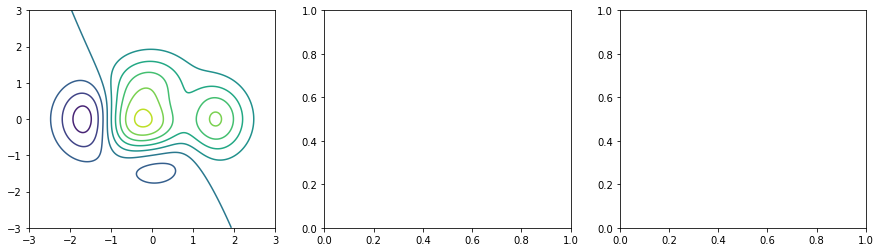

In [62]:
# Plot contour and contourf
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, f(X,Y), 10);
# ax2.contourf(X, Y, f(X,Y), 10);
# ax3.contour(X, Y, f(X,Y), 10, colors='k');
# ax3.contourf(X, Y, f(X,Y), 10);

#### How to add a colorbar?

The **colorbar** has to have its own **Axes**!

By writing ax1.contourf(..., f(X,Y)) you say 'display f(X,Y) using contourf() method of ax1 on ax1'. Unless you want to overlay f(X,Y) with some other array, you can't use ax1 for anything else.

Colorbar is exactly 'something else', something extra, that needs to be shown on an additional **Axes**, and in order to create this **Axes** we use a figure method, `fig.colorbar()`.

But (!) you also need to specify for which subplot you want to have a colorbar. For that you need to create a so called **mappable** object by assigning the output from `contourf()` to a variable, and then pass this **mappable** object to `fig.colorbar()`.

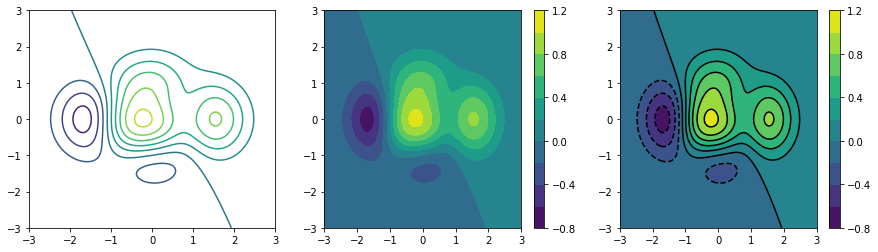

In [63]:
# Plot contour and contourf with colorbars
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, f(X,Y), 10)
mappable2 = ax2.contourf(X, Y, f(X,Y), 10)
mappable3 = ax3.contour(X, Y, f(X,Y), 10, colors='k')
mappable3 = ax3.contourf(X, Y, f(X,Y), 10)
fig.colorbar(mappable2, ax=ax2)
fig.colorbar(mappable3, ax=ax3);

#### How to save a figure?

Use `fig.savefig(fname, dpi=, facecolor=, bbox_inches='tight', **kwargs)`.

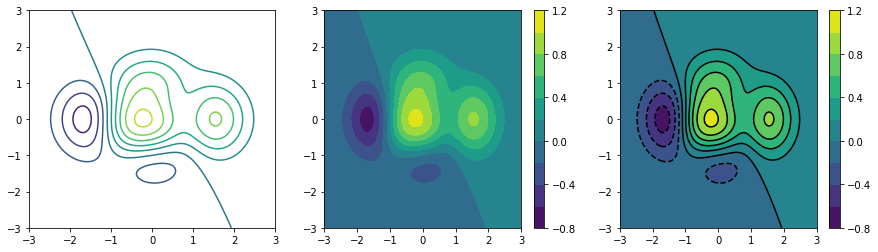

In [64]:
# Save contour and contourf with colorbars
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
ax1.contour(X, Y, f(X,Y), 10)
mappable2 = ax2.contourf(X, Y, f(X,Y), 10)
mappable3 = ax3.contour(X, Y, f(X,Y), 10, colors='k')
mappable3 = ax3.contourf(X, Y, f(X,Y), 10)
fig.colorbar(mappable2, ax=ax2)
fig.colorbar(mappable3, ax=ax3);

fig.savefig('../figures/MY_AWESOME_FIGURE.png', dpi=300, facecolor='moccasin', bbox_inches='tight')

## Final matplotlib exercise (40 mins)

Reproduce the figure below by using `contourf()` for modelled sea surface temperature and `scatter()` for randomly generated 'observed' sea surface temperature. The 'observational dataset' is given below. The code for loading modelling data is written for you (using `np.genfromtxt()`), but you need to manipulate these data for use in `contourf()`.

** Hints:
* start with `scatter()`
* use `.reshape()` for modelling data

![](../figures/FINAL_MATPLOTLIB_FIGURE.png)

Data source: https://podaac-tools.jpl.nasa.gov/las/UI.vm

Dataset: AMSR-E Level 3 Sea Surface Temperature for Climate Model Comparison.

Variable: Sea Surface Temperature (K).

Time : 16-JUN-2002 00:00.

Spacial resolution: 1$^{\circ}$x1$^{\circ}$, 361 by 180 points (logitude by latitude).

Total Number of Records: 64980.

In [65]:
# Read modelling sst data
lon, lat, sst = np.genfromtxt('../data/AMSR-E_Level_3_Sea_Surface_Temperature_for_Climate_Model_Comparison.csv', delimiter=',', 
                              skip_header=10, missing_values='-1.E+34', usemask=True, usecols=(2, 3, 4), unpack=True)

In [66]:
# Generate random 'observational' sst data
num_points = 50 # number of 'observational' points
x = np.random.randint(30, 270, num_points)
y = np.random.randint(-70, 70, num_points)
colors = np.random.randint(270, 305, num_points)

In [67]:
# Your code here

## References: 
* https://matplotlib.org/faq/usage_faq.html
* http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html